## Student Performance Indicator

- Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

## 2.1 Import Data and Required Packages

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Import the CSV Data as Pandas DataFrame**

In [114]:
df = pd.read_csv('student data.csv')

**Show Top 5 Records**

In [115]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Shape of the dataset**

In [116]:
df.shape

(1000, 8)

## 2.2 Dataset information 
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score


## 3. Data Checks to perform:

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column



### 3.1 Check Missing Values

In [117]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [118]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

**There are no missing values in the data set**

### 3.2 Check Duplicates

In [119]:
df.duplicated().sum()

0

**There are no duplicates values in the data set**

### 3.3 Check data type

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [121]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [122]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [123]:
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
353,female,group C,associate's degree,standard,none,46,58,57
529,female,group C,associate's degree,standard,none,62,74,70
724,male,group B,some college,standard,none,47,43,41
198,female,group B,some college,free/reduced,none,45,53,55
777,female,group C,some college,free/reduced,none,35,44,43


In [124]:
for col in df.columns:
    print(f"No. of unique categories in the column {col} is {df[col].nunique()}")
    print(f"{col} : [{', '.join(map(str , df[col].unique()))}]\n")
    

No. of unique categories in the column gender is 2
gender : [female, male]

No. of unique categories in the column race_ethnicity is 5
race_ethnicity : [group B, group C, group A, group D, group E]

No. of unique categories in the column parental_level_of_education is 6
parental_level_of_education : [bachelor's degree, some college, master's degree, associate's degree, high school, some high school]

No. of unique categories in the column lunch is 2
lunch : [standard, free/reduced]

No. of unique categories in the column test_preparation_course is 2
test_preparation_course : [none, completed]

No. of unique categories in the column math_score is 81
math_score : [72, 69, 90, 47, 76, 71, 88, 40, 64, 38, 58, 65, 78, 50, 18, 46, 54, 66, 44, 74, 73, 67, 70, 62, 63, 56, 97, 81, 75, 57, 55, 53, 59, 82, 77, 33, 52, 0, 79, 39, 45, 60, 61, 41, 49, 30, 80, 42, 27, 43, 68, 85, 98, 87, 51, 99, 84, 91, 83, 89, 22, 100, 96, 94, 48, 35, 34, 86, 92, 37, 28, 24, 26, 95, 36, 29, 32, 93, 19, 23, 8]

No. o

In [125]:
# collecting numerical and categorical columns
numeric_features = []
categorical_features = []
for col in df.columns :
    if df[col].dtype == 'O':
        categorical_features.append(col)
    else:
        numeric_features.append(col)

In [126]:
numeric_features

['math_score', 'reading_score', 'writing_score']

In [127]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [128]:
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [129]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "Total Score" and "Average"

In [132]:
df['total score'] = df["math_score"] + df["reading_score"] + df["writing_score"]
df['average'] = round(df['total score']/3 , 3)
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
454,female,group C,associate's degree,free/reduced,none,53,61,62,176,58.667
816,female,group A,bachelor's degree,standard,none,45,59,64,168,56.000
185,male,group C,associate's degree,free/reduced,completed,65,67,65,197,65.667
98,female,group D,some college,free/reduced,none,58,67,62,187,62.333
934,male,group C,associate's degree,standard,completed,98,87,90,275,91.667


In [133]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [134]:
reading_less_30 = df[df['reading_score'] <= 30]['average'].count()
writing_less_30 = df[df['writing_score'] <= 30]['average'].count()
math_less_30 = df[df['math_score'] <= 30]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_30}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_30}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_30}')

Number of students with less than 20 marks in Maths: 16
Number of students with less than 20 marks in Writing: 10
Number of students with less than 20 marks in Reading: 8


## 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

<Axes: ylabel='math_score'>

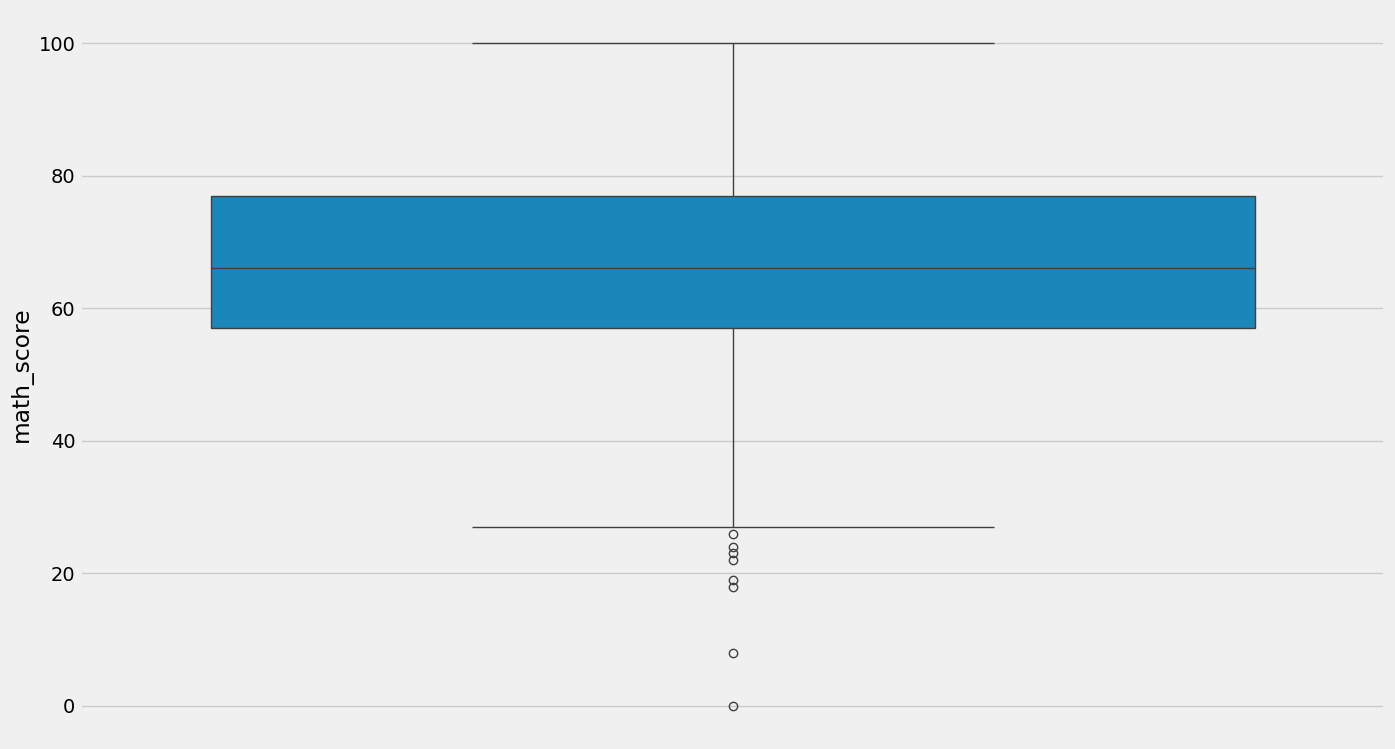

In [190]:
sns.boxplot(df['math_score'])

<Axes: xlabel='gender', ylabel='total score'>

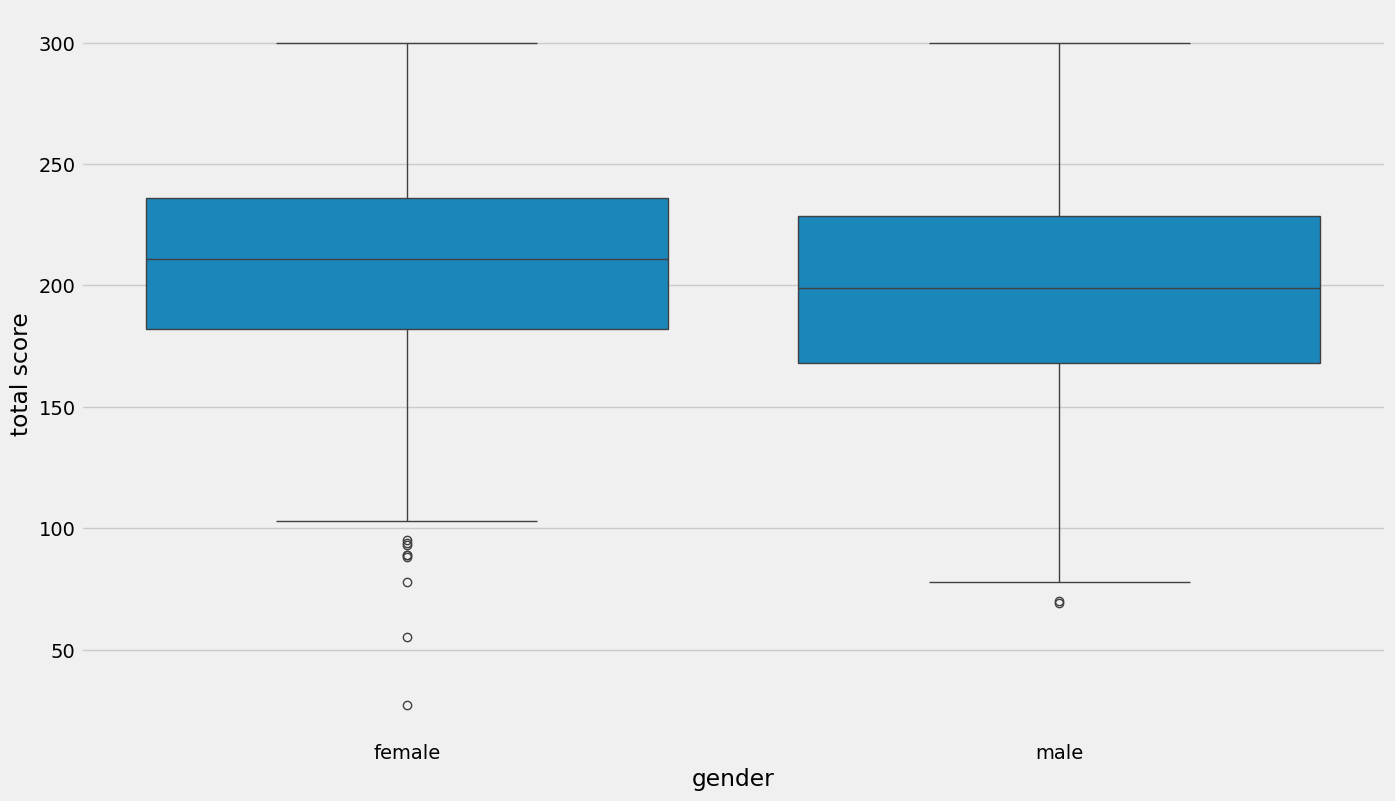

In [192]:
sns.boxplot( x = 'gender', y = 'total score' , data = df )

<Axes: xlabel='gender', ylabel='average'>

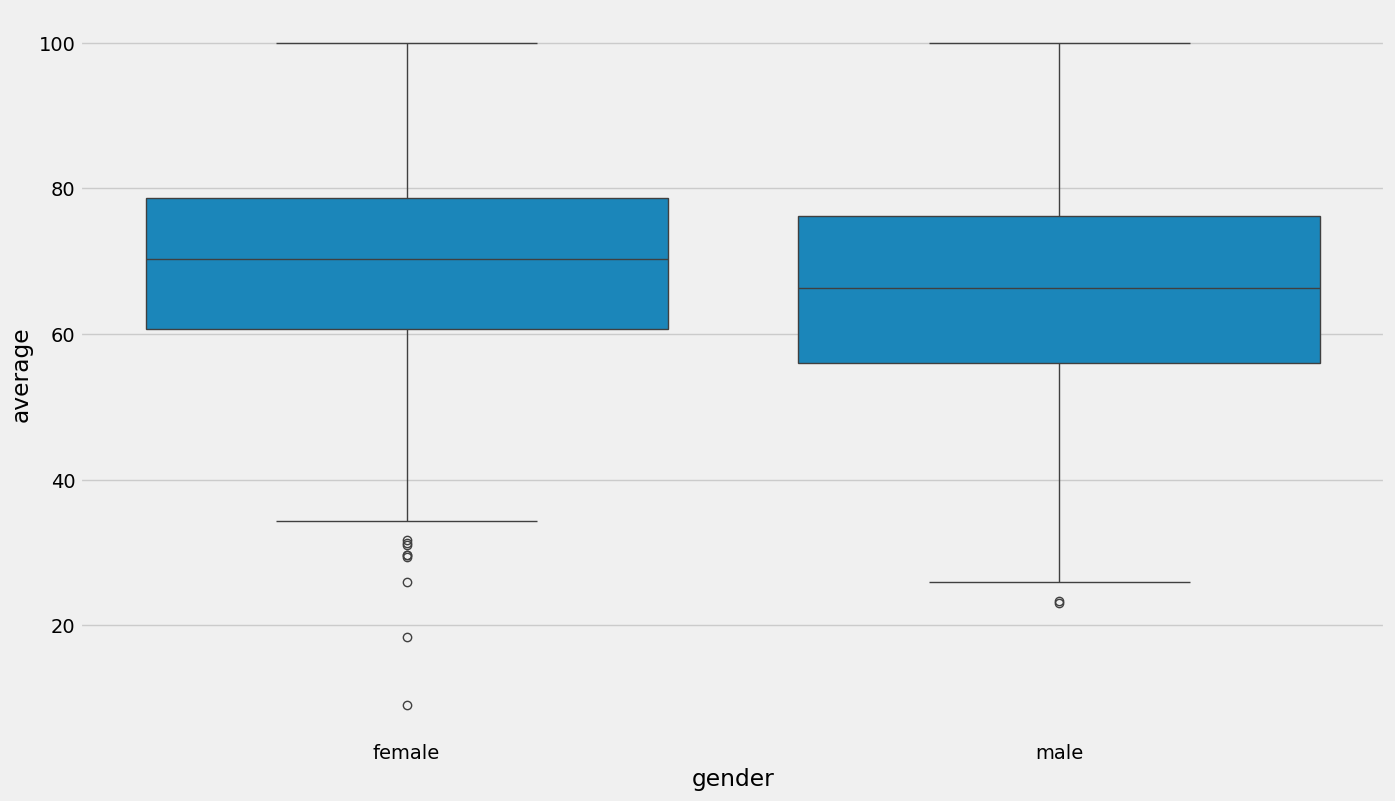

In [193]:
sns.boxplot( x = 'gender', y = 'average' , data = df )

C:\Users\Sushant\AppData\Local\Temp\ipykernel_5244\3473595877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math_score'])


<Axes: xlabel='math_score', ylabel='Density'>

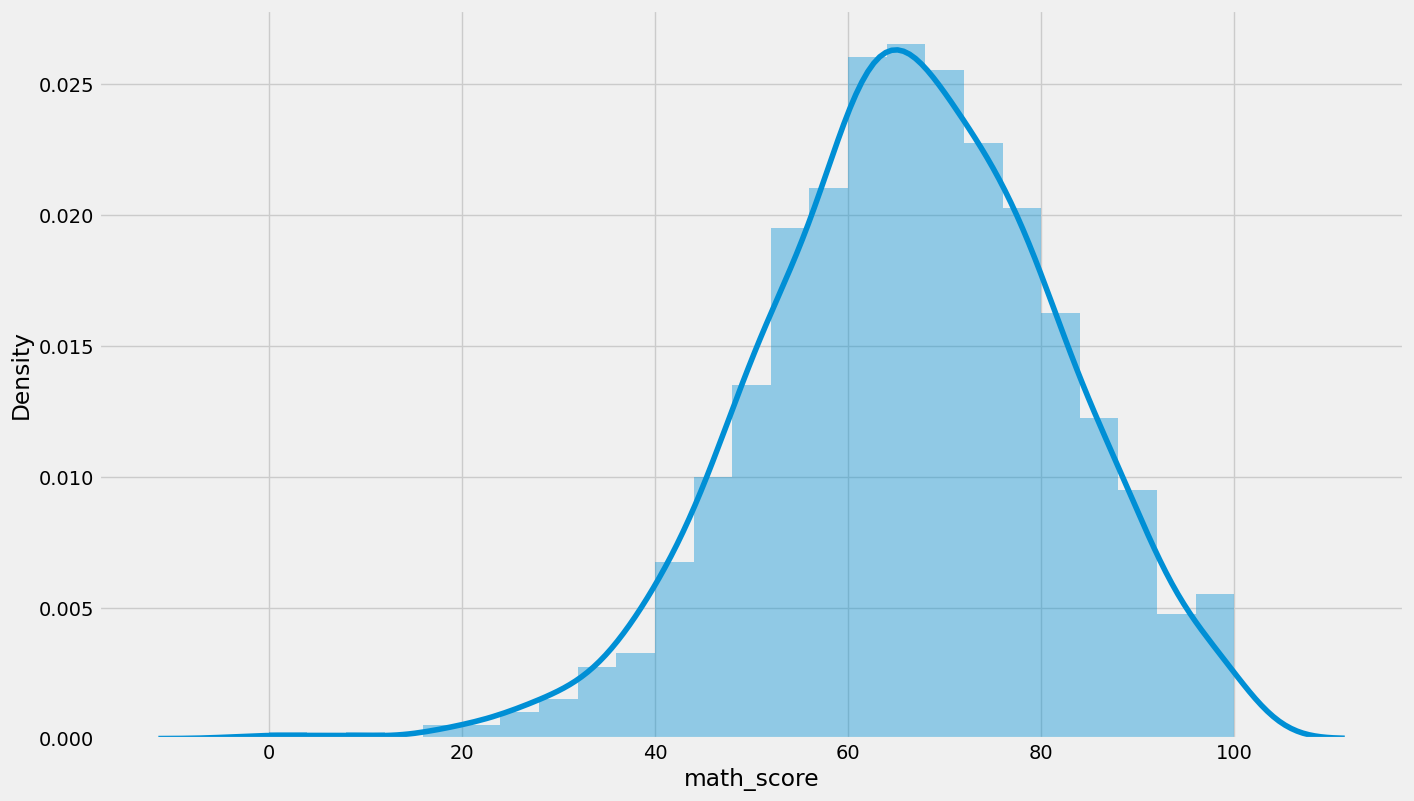

In [189]:
sns.distplot(df['math_score'])

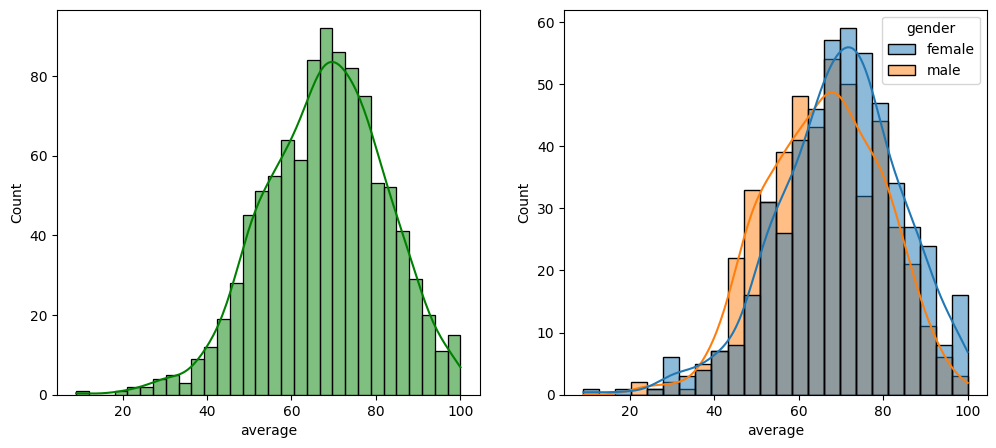

In [135]:
# plt.figure(figsize=(5,4))
# plt.subplot()
# sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
# plt.show()
# sns.histplot(data = df , x = 'average', kde = True , hue = 'gender')
# plt.show()
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

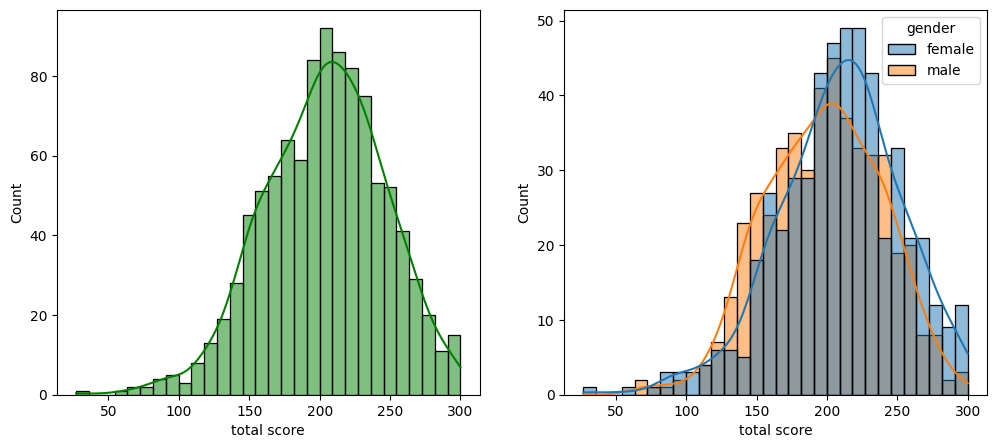

In [136]:
fig , axs = plt.subplots(1,2, figsize=(12,5))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g',hue = 'gender')
plt.show()

**Insights**
- Female students tend to perform well then male students.

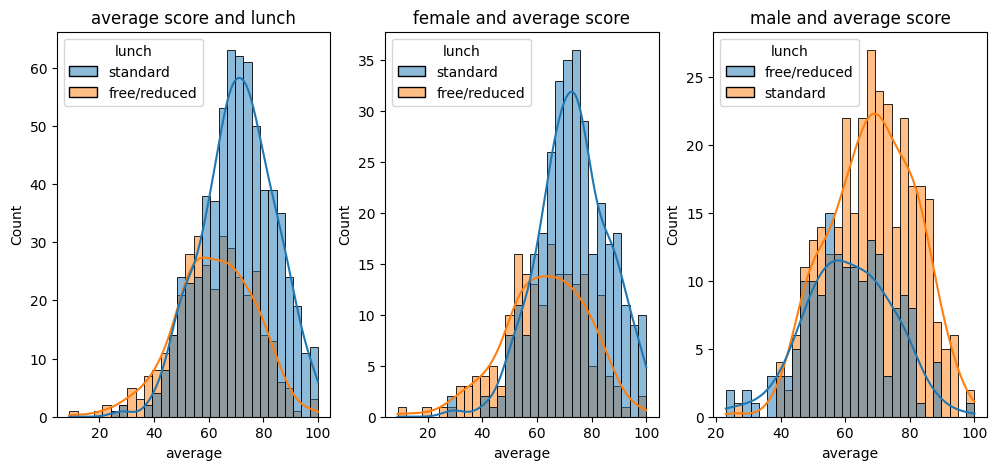

In [151]:
fig , axs = plt.subplots(1,3, figsize=(12,5))

plt.subplot(131)
sns.histplot(data=df,x='average',bins=30,kde=True,hue = 'lunch')
plt.title('average score and lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue = 'lunch')
plt.title('female and average score')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue = 'lunch')
plt.title('male and average score')
plt.show()

**Insights**
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

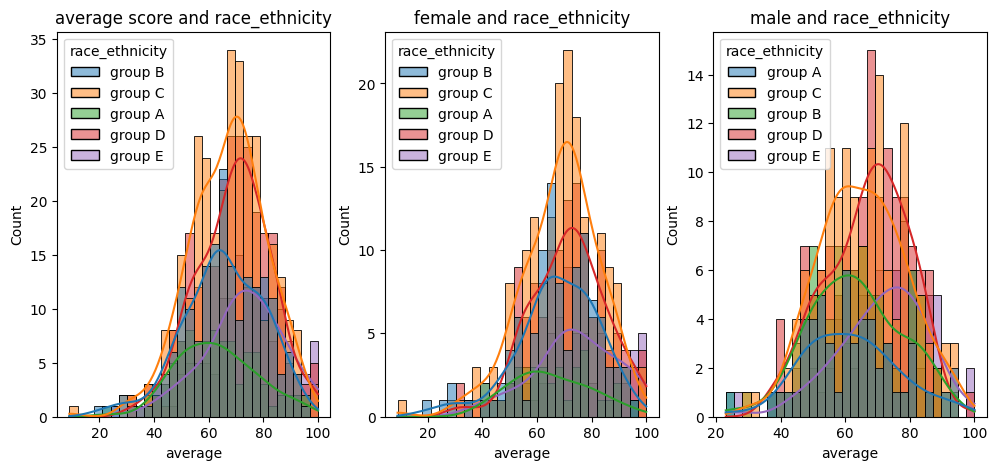

In [153]:
# fig , axs = plt.subplots(1,2, figsize=(12,5))
# plt.subplot(121)
# sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
# plt.subplot(122)
# sns.histplot(data=df,x='average',bins=30,kde=True,color='g',hue = 'race_ethnicity')
# plt.show()

fig , axs = plt.subplots(1,3, figsize=(12,5))

plt.subplot(131)
sns.histplot(data=df,x='average',bins=30,kde=True,hue = 'race_ethnicity')
plt.title('average score and race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue = 'race_ethnicity')
plt.title('female and race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue = 'race_ethnicity')
plt.title('male and race_ethnicity')
plt.show()

**Insights**
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### 4.2 Maximumum score of students in all three subjects

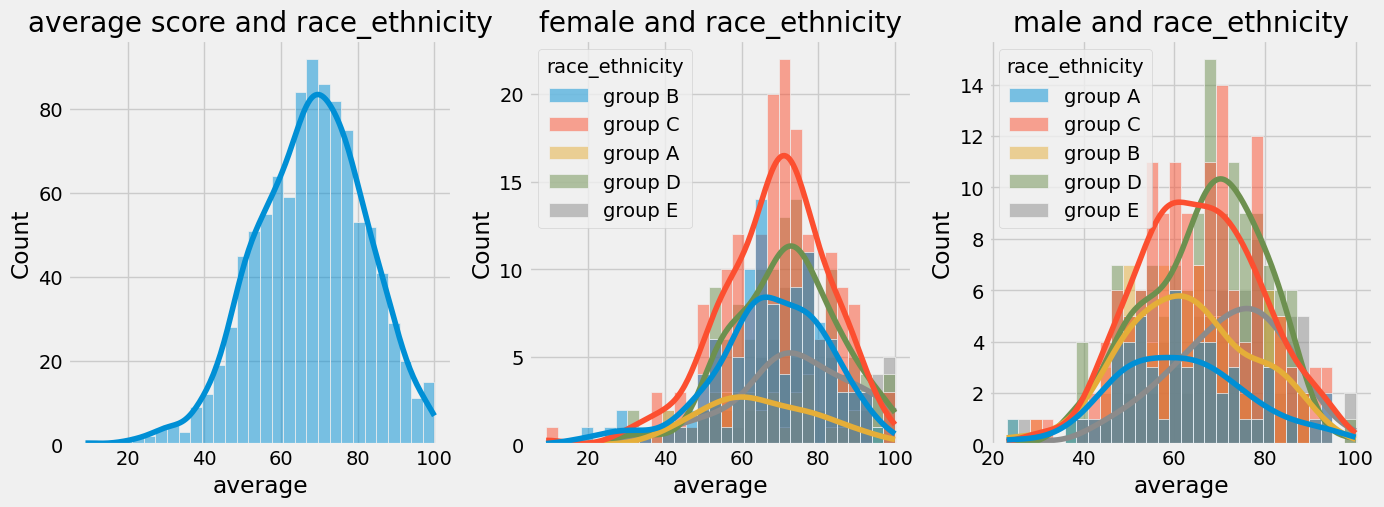

In [199]:
fig , axs = plt.subplots(1,3 , figsize=(15,5))

plt.subplot(131)
sns.histplot(data=df,x='average',bins=30,kde=True)
plt.title('average score and race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',bins=30,kde=True,hue = 'race_ethnicity')
plt.title('female and race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',bins=30,kde=True,hue = 'race_ethnicity')
plt.title('male and race_ethnicity')
plt.show()

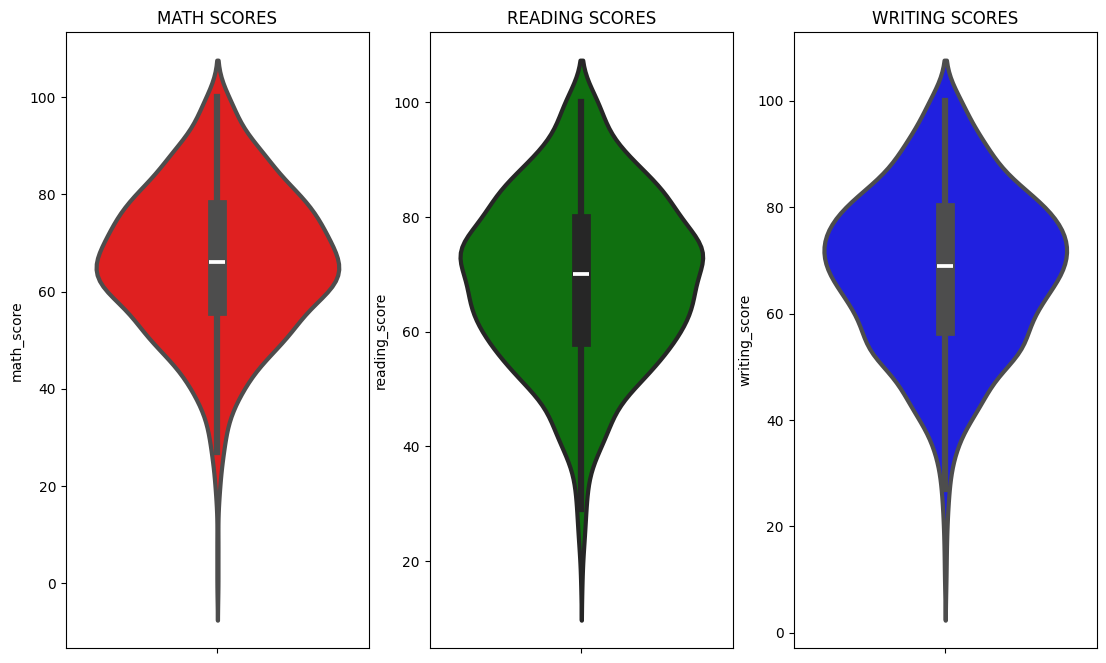

In [162]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

In [163]:
math_full

7

<Axes: xlabel='math_score', ylabel='parental_level_of_education'>

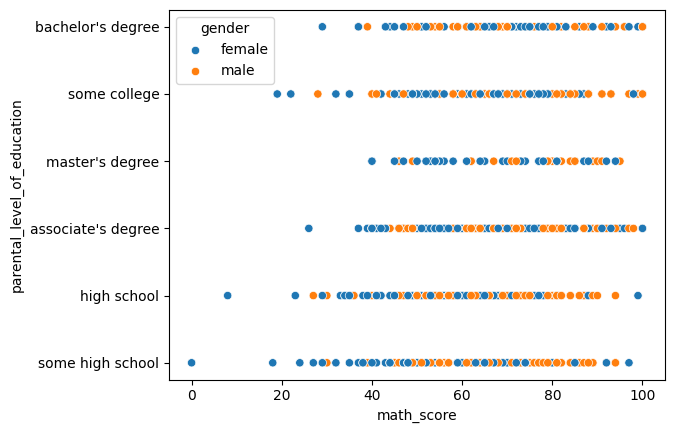

In [173]:
sns.scatterplot( data = df , x = 'math_score' , y='parental_level_of_education' , hue='gender' )

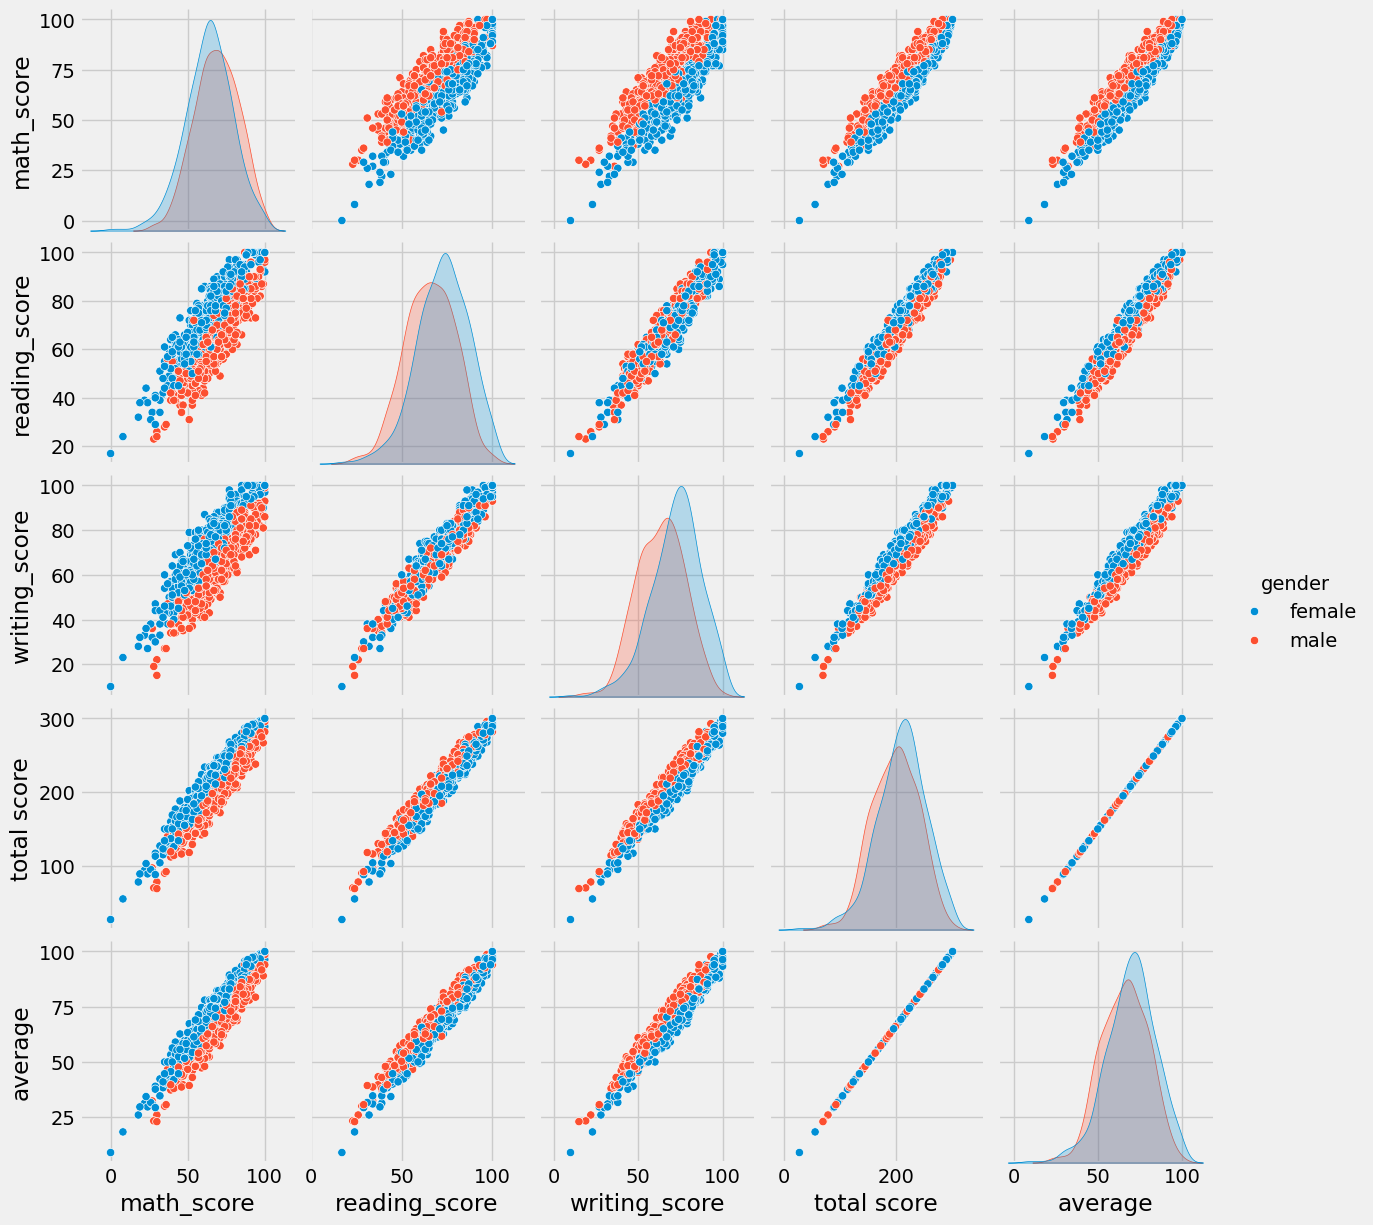

In [183]:
sns.pairplot(df , hue='gender')

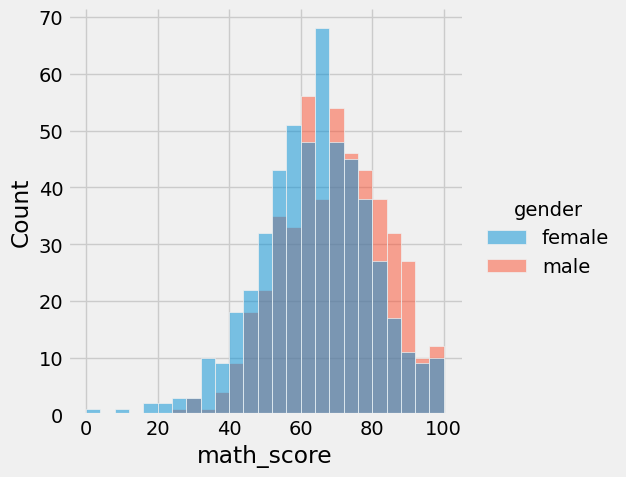

In [182]:
sns.displot(data = df , x = 'math_score', hue='gender',kind='hist')

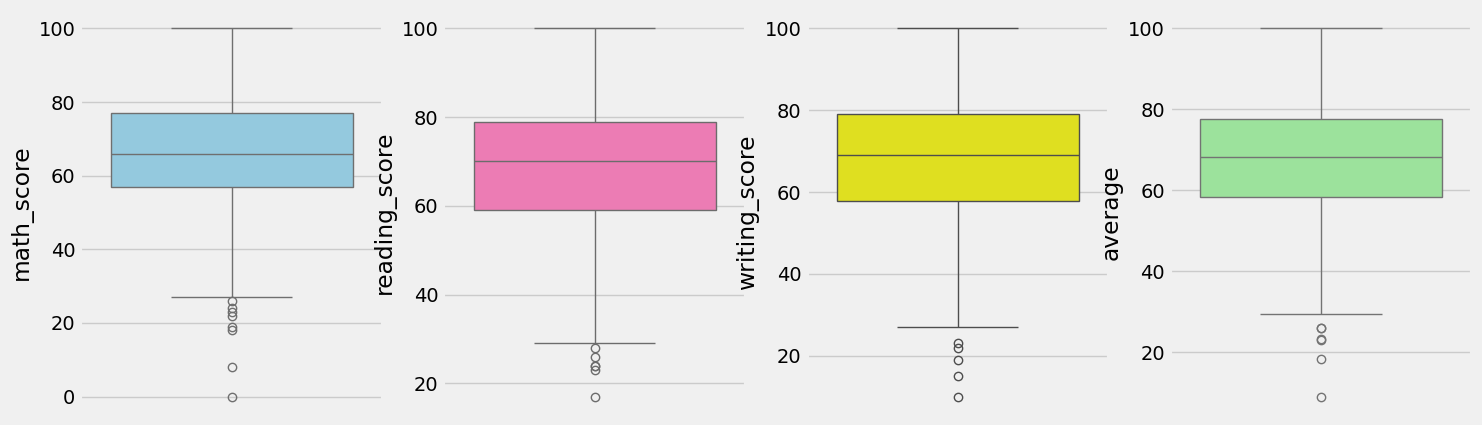

In [179]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

In [137]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.667
1,female,group C,some college,standard,completed,69,90,88,247,82.333
2,female,group B,master's degree,standard,none,90,95,93,278,92.667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333
4,male,group C,some college,standard,none,76,78,75,229,76.333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000
998,female,group D,some college,standard,completed,68,78,77,223,74.333
